<a href="https://colab.research.google.com/github/NoamYakarOfficial/Handrwitten-Digit-Recognition-with-Python/blob/main/Neural_Net_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the MNIST Dataset!

In [28]:
from keras.datasets import mnist

In [29]:
#loading in our data and setting the data to unique variables we can later access
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [30]:
#let's look at the dimensions of our inputs and our expected outputs
print("Number of training images: " + str(x_train.shape[0]))
print("Number of testing images: " + str(x_test.shape[0]))

print("Image Dimensions: " + str((x_train.shape[1], x_train.shape[2])))

Number of training images: 60000
Number of testing images: 10000
Image Dimensions: (28, 28)


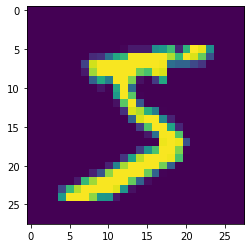

In [31]:
#let's plot the first entry in the mnist dataset!
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

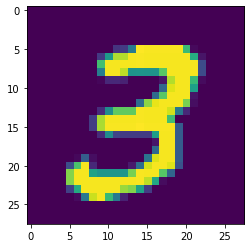

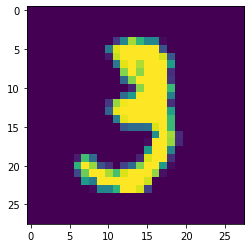

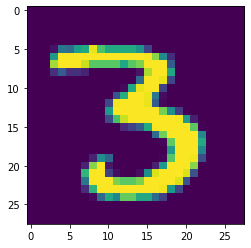

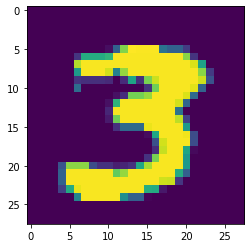

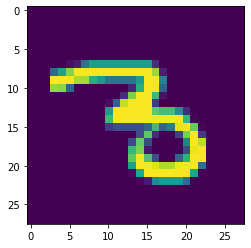

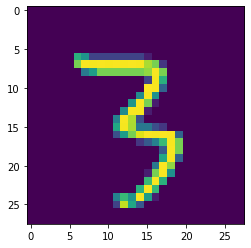

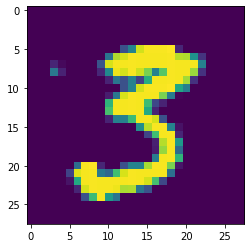

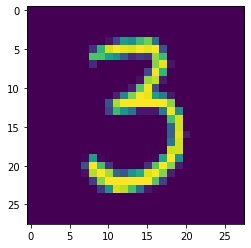

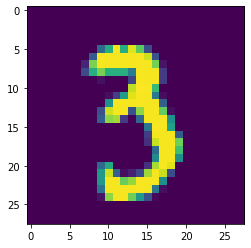

In [32]:
#what if we tried outputing only nunbers with a specific label, we want to see the variety in how some numbers are written!
numOfImagesDisplayed = 0
for i in range(1000):
  if y_train[i] == 3:
    numOfImagesDisplayed += 1
    if numOfImagesDisplayed == 10:
      break

    plt.imshow(x_train[i])
    plt.show()
  else:
    continue

Normalize Pixel Data

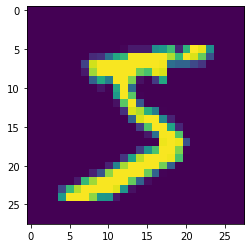

In [33]:
#we need to normalize our data, shrinking pixel values from  0 - 255 to 0 - 1.
#This is because our input layer expects neruon values to be passed in, which are between 0 and 1
x_train = x_train / 255 
x_test = x_test / 255
plt.imshow(x_train[0])

Creating our Neural Network

In [34]:
import tensorflow as tf

#building neural network to deal with our images!
neural_net = tf.keras.Sequential()

#This is our input layer. We chose 28x28 because it seems like a common sense way of giving a 28x28 pixel image to a neural net.
#Other input schemes can be used, as long as all of the information is passed in one way or the other
neural_net.add(tf.keras.layers.Flatten(input_shape=(28,28)))

#These are our "hidden layers". They're called hideen because we don't necessarily know what each layer is doing;
#we architected this network based on which arch. gets the lowest error/highest accuracy. We can create explanations for what
#they might be doing, like breaking a digit up into different shapes, but we don't actually know what each individual neuron,
#or even what each layer is doing. This particular configuration is highly influenced by the results of trial and error.
neural_net.add(tf.keras.layers.Dense(16, activation='relu'))
neural_net.add(tf.keras.layers.Dense(16, activation='relu'))

#This is where it all comes together; our output layer. You can read up about softmax if you wish, but you don't really need to know it
#just yet. All that needs to be taken away from the following line is that at the end of the day, our inputs all come out to 10 outputs,
#which is what we think the image has inside of it. If we were classifying even more characters, we could expand this to 26 for the alphabet,
#or 26 for every letter and number!
neural_net.add(tf.keras.layers.Dense(10, activation='softmax'))
neural_net.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                12560     
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [36]:

neural_net.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

model_history = neural_net.fit(x_train,y_train, validation_split=0.2, batch_size=32, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4995 - accuracy: 0.8535 - val_loss: 0.2647 - val_accuracy: 0.9242
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2533 - accuracy: 0.9274 - val_loss: 0.2326 - val_accuracy: 0.9336
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2147 - accuracy: 0.9393 - val_loss: 0.2163 - val_accuracy: 0.9397
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1916 - accuracy: 0.9452 - val_loss: 0.2066 - val_accuracy: 0.9431
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1747 - accuracy: 0.9491 - val_loss: 0.1959 - val_accuracy: 0.9468
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1637 - accuracy: 0.9526 - val_loss: 0.1835 - val_accuracy: 0.9496
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1533 - accuracy: 0.9549 - val_loss: 0.1980 - val_accuracy:

In [37]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


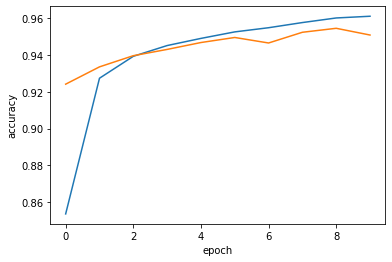

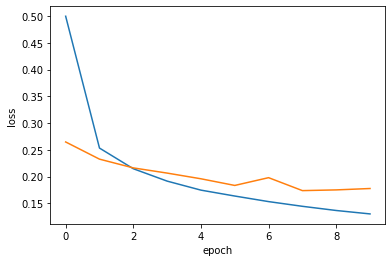

In [41]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

1919


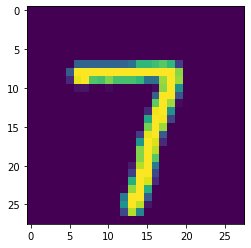

In [89]:
import random as rand
randomInt = rand.randint(1, 10000)
print(randomInt)

plt.imshow(x_test[randomInt])

In [90]:
print(x_test[randomInt].shape)

(28, 28)


In [91]:
input = x_test[randomInt].reshape((-1,784))

In [92]:
output_prediction = neural_net.predict(input)
output_prediction

array([[1.3636780e-08, 1.1231959e-07, 4.2463926e-06, 1.9970986e-04,
        4.5649141e-11, 5.8658809e-08, 2.5434869e-11, 9.9979526e-01,
        2.8985578e-09, 6.0566367e-07]], dtype=float32)

In [93]:
import numpy as np
predicted_val = np.argmax(output_prediction)
predicted_val

7

Text(0.5, 1.0, 'The predicted class: 7')

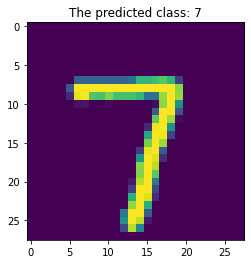

In [94]:
plt.imshow(x_test[randomInt])
plt.title("The predicted class: " + str(predicted_val))